In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Flatten
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import datasets

In [3]:
mnist = datasets.mnist

In [4]:
(X_train , y_train) , (X_test, y_test) = mnist.load_data()

print (X_train.shape , y_train.shape) , (X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


(None, ((10000, 28, 28), (10000,)))

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
print('Number of unique classes : ' , len(np.unique(y_train)))
print('classes: ' , np.unique(y_train))

Number of unique classes :  10
classes:  [0 1 2 3 4 5 6 7 8 9]


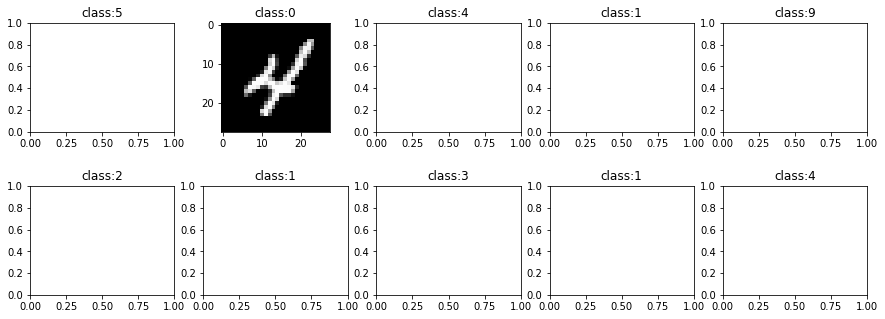

In [14]:
fig , axes = plt.subplots(nrows = 2 , ncols = 5 , figsize = (15,5))
ax = axes.ravel()
for i in range(10):
    ax[1].imshow(X_train[i].reshape(28,28), cmap = 'gray')
    ax[i].title.set_text('class:' + str(y_train[i]))
plt.subplots_adjust(hspace = 0.5)
plt.show()   

In [16]:
img = np.squeeze(X_train[7].reshape(28,28))
img.shape

(28, 28)

In [72]:
fig = plt.figure(figure = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap = 'gray')
width , height = img.shape
thresh = img.max()/2.5

for x in range(width):
  for y in range(height):
    val = round(img[x][y],2) if img[x][y] != 0 else 0
    ax.annotate(str(val) , xy = (y,x)),
    horizontalaligment ='center',
    verticalalignment = 'center',
    color='white' if img[x][y]<thresh else 'black')

SyntaxError: ignored

In [34]:
model = Sequential() 

model.add(Dense(400, activation = 'relu' ,input_dim = X_train.shape[1]))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
           
model.add(Dense(10 , activation = 'softmax'))
           
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               102656    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 458,458
Trainable params: 458,458
Non-trainable params: 0
_________________________________________________________________


In [44]:
#from tensorflow.keras.callbacks import Earlystopping
#early_stop = Earlystopping(monitor = 'val_loss' , patience = 20)
model.fit(X_train, y_train, epochs = 5 , verbose = 1 , validation_data = (X_test , y_test)) #, callbacks = [early_stop])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0538 - accuracy: 0.9838 - val_loss: 0.1008 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0438 - accuracy: 0.9868 - val_loss: 0.0846 - val_accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0376 - accuracy: 0.9890 - val_loss: 0.0839 - val_accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0785 - val_accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0283 - accuracy: 0.9918 - val_loss: 0.0807 - val_accuracy: 0.9806


In [50]:
 model.history.history


{'accuracy': [0.9837999939918518,
  0.9868333339691162,
  0.9890499711036682,
  0.9896833300590515,
  0.9917833209037781],
 'loss': [0.05376342311501503,
  0.04379609227180481,
  0.037643734365701675,
  0.033152058720588684,
  0.02832849696278572],
 'val_accuracy': [0.9718999862670898,
  0.9779000282287598,
  0.9768999814987183,
  0.9769999980926514,
  0.9805999994277954],
 'val_loss': [0.1008324921131134,
  0.08459363132715225,
  0.08389690518379211,
  0.0784633457660675,
  0.08065516501665115]}

In [52]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.053763,0.983800,0.100832,0.9719
1,0.043796,0.986833,0.084594,0.9779
2,0.037644,0.989050,0.083897,0.9769
3,0.033152,0.989683,0.078463,0.9770
4,0.028328,0.991783,0.080655,0.9806


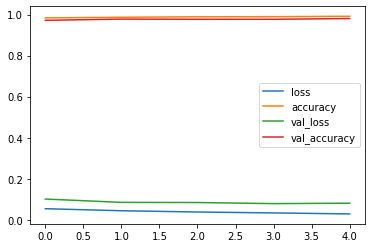

In [54]:
losses.plot()

In [63]:
predictions = model.predict_classes(X_test)
f1 = f1_score(y_test , predictions , average = 'micro')

pred = model.predict_proba(X_test)
roc = roc_auc_score(y_test , pred , multi_class = 'ovo')

acc = accuracy_score(y_test , predictions)
err = 1 - acc

stat = pd.DataFrame({'Test accuracy' : round (acc*100, 3),
                     'F1 score' : round(f1*100,3),
                     'Total loss' : round(err*100,3)},
                    index = [0])

stat.head()

,Test accuracy,F1 score,Total loss
0,98.06,98.06,1.94


In [64]:
sample_one = np.expand_dims(X_test[13] , axis = 0)
model.predict_classes(sample_one)

array([0])

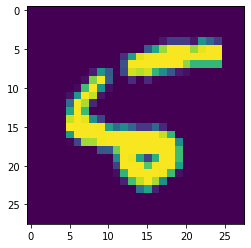

In [81]:
plt.imshow(X_test[8].reshape(28,28))